In [95]:
import pandas as pd
import numpy as np
import math
df=pd.read_csv("/Users/macbook/Downloads/query_2009-01-01_2015-01-01_200k.csv")
df


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.20,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1
1,11.80,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2
2,26.60,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1
3,19.80,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2
4,3.40,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1
...,...,...,...,...,...,...,...
90738,14.50,2014-12-31 22:08:00+00:00,-73.980395,40.742585,-73.994602,40.769627,1
90739,9.50,2014-12-31 22:19:11+00:00,-73.962421,40.794752,-73.940646,40.814270,2
90740,74.16,2014-12-31 22:26:27+00:00,-73.783610,40.648637,-74.091878,40.626073,2
90741,8.50,2014-12-31 22:29:09+00:00,-73.995097,40.752067,-73.981982,40.766362,1


In [96]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,90743.000000,90743.000000,90743.000000,90743.000000,90743.000000,90743.000000
mean,11.184033,-72.515382,39.943378,-72.532666,39.941231,1.683149
std,9.550824,10.696278,8.880565,12.055413,8.878703,1.303741
min,-2.500000,-736.583333,-74.009777,-1749.704532,-74.015157,0.000000
25%,6.000000,-73.992067,40.735081,-73.991378,40.734218,1.000000
50%,8.500000,-73.981852,40.752687,-73.980203,40.753308,1.000000
75%,12.500000,-73.967212,40.767072,-73.963797,40.767990,2.000000
max,208.000000,169.972765,1963.515858,169.972765,1963.515858,6.000000


In [97]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [98]:
print(df.shape)
df.duplicated().nunique()


(90743, 7)


1

In [99]:
df=df.drop_duplicates()


In [100]:
df['fare_amount'].isnull().sum()

0

In [101]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Rayon de la Terre en km
    # Convertir les degrés en radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Différences des coordonnées
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Formule de Haversine
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Calculer la distance
    distance = R * c
    return distance


In [102]:
df["distance"]= df.apply(lambda x: haversine(x.pickup_longitude,x.pickup_latitude,x.dropoff_longitude,x.dropoff_latitude),axis=1)
df["distance"]

0         0.471494
1         3.323085
2        10.056093
3         1.456509
4         0.104855
           ...    
90738     1.784262
90739     2.494499
90740    34.284866
90741     1.522804
90742     1.965215
Name: distance, Length: 90743, dtype: float64

In [103]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.20,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1,0.471494
1,11.80,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2,3.323085
2,26.60,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1,10.056093
3,19.80,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2,1.456509
4,3.40,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1,0.104855
...,...,...,...,...,...,...,...,...
90738,14.50,2014-12-31 22:08:00+00:00,-73.980395,40.742585,-73.994602,40.769627,1,1.784262
90739,9.50,2014-12-31 22:19:11+00:00,-73.962421,40.794752,-73.940646,40.814270,2,2.494499
90740,74.16,2014-12-31 22:26:27+00:00,-73.783610,40.648637,-74.091878,40.626073,2,34.284866
90741,8.50,2014-12-31 22:29:09+00:00,-73.995097,40.752067,-73.981982,40.766362,1,1.522804


In [104]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,90743.000000,90743.000000,90743.000000,90743.000000,90743.000000,90743.000000,90743.000000
mean,11.184033,-72.515382,39.943378,-72.532666,39.941231,1.683149,18.101656
std,9.550824,10.696278,8.880565,12.055413,8.878703,1.303741,361.933164
min,-2.500000,-736.583333,-74.009777,-1749.704532,-74.015157,0.000000,0.000000
25%,6.000000,-73.992067,40.735081,-73.991378,40.734218,1.000000,0.815356
50%,8.500000,-73.981852,40.752687,-73.980203,40.753308,1.000000,1.517981
75%,12.500000,-73.967212,40.767072,-73.963797,40.767990,2.000000,2.788609
max,208.000000,169.972765,1963.515858,169.972765,1963.515858,6.000000,13818.611629


In [105]:
df["passenger_count"].nunique()

7

(array([  320., 62729.,     0., 13420.,     0.,  4068.,  1950.,     0.,
         6375.,  1881.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

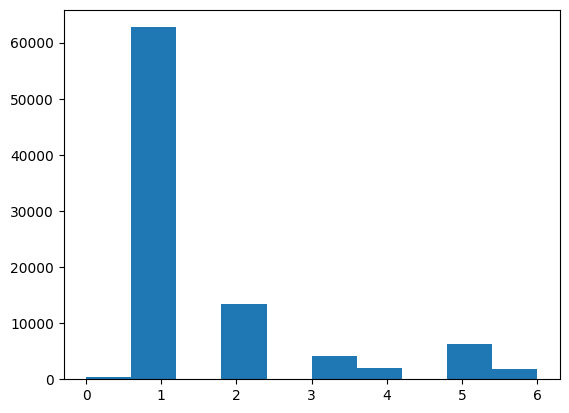

In [106]:
import matplotlib.pyplot as plt
plt.hist(df.passenger_count)

In [107]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,90743.000000,90743.000000,90743.000000,90743.000000,90743.000000,90743.000000,90743.000000
mean,11.184033,-72.515382,39.943378,-72.532666,39.941231,1.683149,18.101656
std,9.550824,10.696278,8.880565,12.055413,8.878703,1.303741,361.933164
min,-2.500000,-736.583333,-74.009777,-1749.704532,-74.015157,0.000000,0.000000
25%,6.000000,-73.992067,40.735081,-73.991378,40.734218,1.000000,0.815356
50%,8.500000,-73.981852,40.752687,-73.980203,40.753308,1.000000,1.517981
75%,12.500000,-73.967212,40.767072,-73.963797,40.767990,2.000000,2.788609
max,208.000000,169.972765,1963.515858,169.972765,1963.515858,6.000000,13818.611629


In [108]:
# Trouver l'indice de la ligne avec la valeur maximale dans la colonne 'distance'
max_distance_idx = df['distance'].idxmax()

# Afficher la ligne correspondante
max_distance_row = df.loc[max_distance_idx]
print(max_distance_row)

fare_amount                                4.1
pickup_datetime      2012-03-03 12:46:00+00:00
pickup_longitude                    -73.978292
pickup_latitude                      40.729677
dropoff_longitude                 -1749.704532
dropoff_latitude                     40.732877
passenger_count                              1
distance                          13818.611629
Name: 48159, dtype: object


In [109]:
# Supprimer la ligne correspondante  de outlier errone en utilisant l'indice
df = df.drop(max_distance_idx)

In [110]:
df.shape

(90742, 8)

In [111]:
# Filtrer les lignes où fare_amount est positif ou égal à 0
df = df[df['fare_amount'] >= 0]

# Vérifier la nouvelle taille du DataFrame pour s'assurer que les lignes ont été supprimées
print(df.shape)

(90741, 8)


In [112]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,90741.000000,90741.000000,90741.000000,90741.000000,90741.000000,90741.000000,90741.000000
mean,11.184262,-72.515352,39.943362,-72.514169,39.941214,1.683153,17.949769
std,9.550792,10.696394,8.880662,10.692811,8.878800,1.303753,359.025872
min,2.500000,-736.583333,-74.009777,-734.833333,-74.015157,0.000000,0.000000
25%,6.000000,-73.992067,40.735082,-73.991378,40.734218,1.000000,0.815368
50%,8.500000,-73.981853,40.752688,-73.980203,40.753308,1.000000,1.517981
75%,12.500000,-73.967212,40.767076,-73.963798,40.767990,2.000000,2.788577
max,208.000000,169.972765,1963.515858,169.972765,1963.515858,6.000000,8680.837889


In [113]:
# Filtrer les lignes où la distance est inférieure à 100km
filtered_df = df[df['distance'] < 100]

# Afficher la taille du DataFrame filtré
filtered_df.shape


(90562, 8)

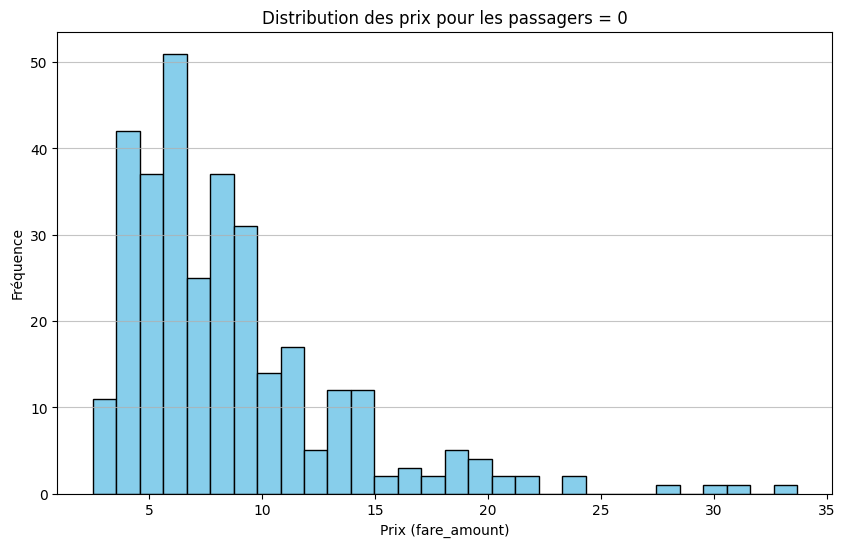

In [114]:
# Filtrer les données pour les passagers égaux à 0
zero_passengers = df[df['passenger_count'] == 0]

# Créer un histogramme des prix
plt.figure(figsize=(10, 6))
plt.hist(zero_passengers['fare_amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution des prix pour les passagers = 0')
plt.xlabel('Prix (fare_amount)')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75)
plt.show()

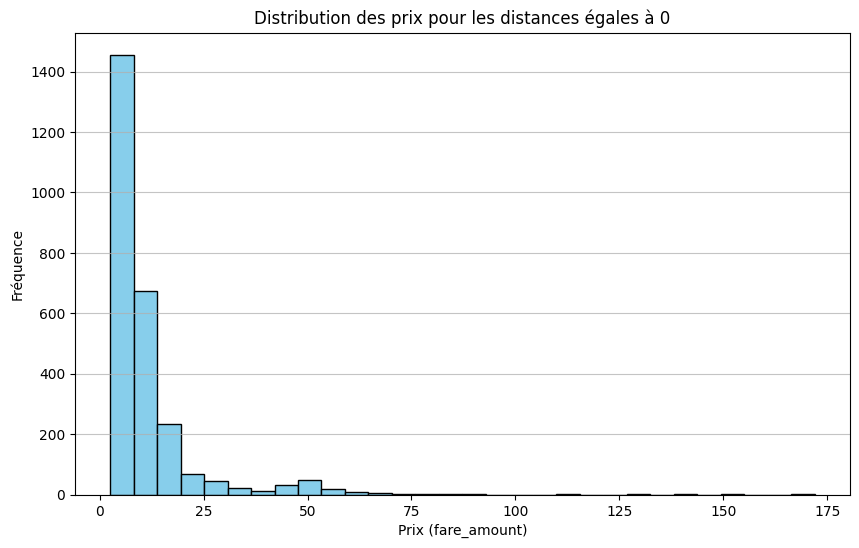

In [130]:

# Filtrer les données pour les distances égales à 0
zero_distance = df[df['distance'] == 0]

# Créer un histogramme des prix
plt.figure(figsize=(10, 6))
plt.hist(zero_distance['fare_amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution des prix pour les distances égales à 0')
plt.xlabel('Prix (fare_amount)')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [132]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,passenger_count_scaled
count,90741.000000,90741.000000,90741.000000,90741.000000,90741.000000,90741.000000,90741.000000,90741.000000
mean,11.184262,-72.515352,39.943362,-72.514169,39.941214,1.683153,17.949769,0.280526
std,9.550792,10.696394,8.880662,10.692811,8.878800,1.303753,359.025872,0.217292
min,2.500000,-736.583333,-74.009777,-734.833333,-74.015157,0.000000,0.000000,0.000000
25%,6.000000,-73.992067,40.735082,-73.991378,40.734218,1.000000,0.815368,0.166667
50%,8.500000,-73.981853,40.752688,-73.980203,40.753308,1.000000,1.517981,0.166667
75%,12.500000,-73.967212,40.767076,-73.963798,40.767990,2.000000,2.788577,0.333333
max,208.000000,169.972765,1963.515858,169.972765,1963.515858,6.000000,8680.837889,1.000000


In [120]:
# Trouver le nombre de valeurs égales à zéro dans la colonne 'distance'
zero_count = (df['distance'] == 0).sum()
print(f"Nombre de valeurs égales à zéro dans 'distance' : {zero_count}")


Nombre de valeurs égales à zéro dans 'distance' : 2632


In [121]:
rows_with_zero_distance = df[df['distance'] == 0]
rows_with_zero_distance

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,passenger_count_scaled
15,17.7,2009-01-01 17:03:21+00:00,-73.137393,41.366138,-73.137393,41.366138,3,0.0,0.500000
17,10.9,2009-01-01 18:39:29+00:00,-73.137393,41.366138,-73.137393,41.366138,1,0.0,0.166667
60,10.6,2009-01-03 01:06:15+00:00,0.000000,0.000000,0.000000,0.000000,2,0.0,0.333333
163,27.3,2009-01-06 08:20:40+00:00,-74.030802,40.783982,-74.030802,40.783982,2,0.0,0.333333
188,6.9,2009-01-06 21:24:00+00:00,0.000000,0.000000,0.000000,0.000000,5,0.0,0.833333
...,...,...,...,...,...,...,...,...,...
90650,60.0,2014-12-29 13:54:00+00:00,0.000000,0.000000,0.000000,0.000000,3,0.0,0.500000
90672,2.5,2014-12-30 02:18:18+00:00,-73.996022,40.755331,-73.996022,40.755331,1,0.0,0.166667
90683,6.0,2014-12-30 12:51:18+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,0.166667
90694,12.0,2014-12-30 17:22:34+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,0.166667


In [122]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,passenger_count_scaled
count,90741.000000,90741.000000,90741.000000,90741.000000,90741.000000,90741.000000,90741.000000,90741.000000
mean,11.184262,-72.515352,39.943362,-72.514169,39.941214,1.683153,17.949769,0.280526
std,9.550792,10.696394,8.880662,10.692811,8.878800,1.303753,359.025872,0.217292
min,2.500000,-736.583333,-74.009777,-734.833333,-74.015157,0.000000,0.000000,0.000000
25%,6.000000,-73.992067,40.735082,-73.991378,40.734218,1.000000,0.815368,0.166667
50%,8.500000,-73.981853,40.752688,-73.980203,40.753308,1.000000,1.517981,0.166667
75%,12.500000,-73.967212,40.767076,-73.963798,40.767990,2.000000,2.788577,0.333333
max,208.000000,169.972765,1963.515858,169.972765,1963.515858,6.000000,8680.837889,1.000000


In [123]:
zero_fare_count = (df['fare_amount'] == 0).sum()
print(f"Nombre de valeurs égales à zéro dans 'fare_amount' : {zero_fare_count}")

Nombre de valeurs égales à zéro dans 'fare_amount' : 0


In [124]:
zero_passenger_count = (df['passenger_count'] == 0).sum()
print(f"Nombre de valeurs égales à zéro dans 'passenger_count' : {zero_passenger_count}")

Nombre de valeurs égales à zéro dans 'passenger_count' : 320


In [125]:
rows_with_zero_fare = df[df['passenger_count'] == 0]
rows_with_zero_fare

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,passenger_count_scaled
209,2.5,2009-01-07 17:50:31+00:00,-73.137393,41.366138,-73.137393,41.366138,0,0.000000,0.0
28494,13.3,2010-11-28 13:40:28+00:00,-73.776715,40.645297,-73.791230,40.667452,0,1.754500,0.0
29421,4.5,2010-12-19 14:37:55+00:00,-73.993757,40.746520,-73.998228,40.735308,0,0.604407,0.0
29625,5.3,2010-12-24 13:57:59+00:00,-73.967743,40.769217,-73.966312,40.761945,0,0.274218,0.0
29672,5.7,2010-12-26 15:17:18+00:00,-73.984412,40.748295,-73.983110,40.756003,0,0.277277,0.0
...,...,...,...,...,...,...,...,...,...
50820,4.1,2012-04-30 06:25:09+00:00,-73.971047,40.787683,-73.968835,40.792497,0,0.286963,0.0
50834,8.5,2012-04-30 15:26:03+00:00,-73.967342,40.803543,-73.982395,40.777438,0,1.855745,0.0
50844,6.1,2012-04-30 19:30:05+00:00,-73.999263,40.733963,-73.985958,40.734918,0,1.479738,0.0
50854,8.9,2012-04-30 21:38:37+00:00,-73.951202,40.791157,-73.949948,40.821932,0,0.956295,0.0


In [126]:
# Corrélation avant remplacement
correlation_before = df['distance'].corr(df['fare_amount'])
print(f"Corrélation avant remplacement : {correlation_before}")


Corrélation avant remplacement : 0.02147756800796609


In [127]:
# Remplacer les zéros par la médiane
#median_distance = df[df['distance'] > 0]['distance'].median()
#df['distance'] = df['distance'].replace(0, median_distance)

# Corrélation après remplacement
#correlation_after = df['distance'].corr(df['fare_amount'])
#print(f"Corrélation après remplacement : {correlation_after}")

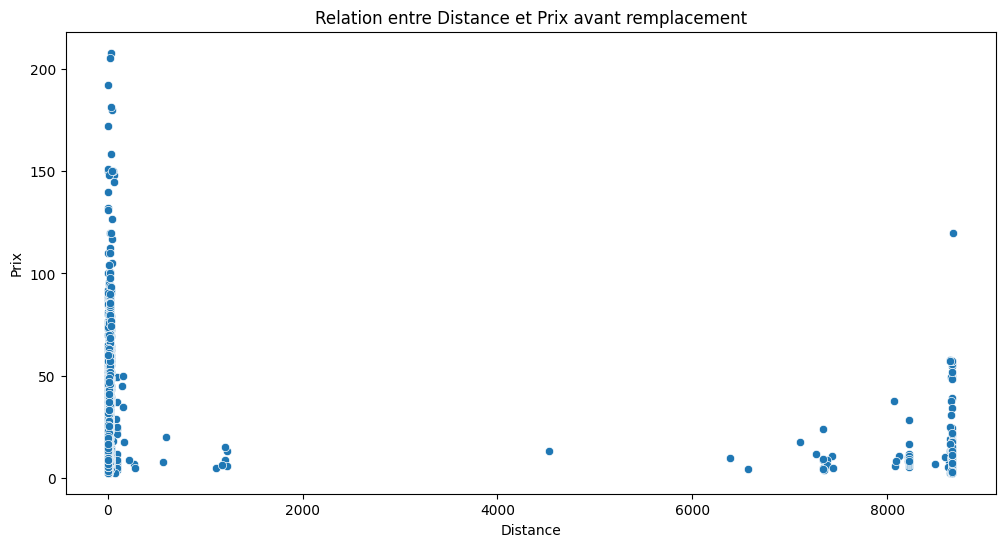

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation avant remplacement
plt.figure(figsize=(12, 6))
sns.scatterplot(x='distance', y='fare_amount', data=df)
plt.title('Relation entre Distance et Prix avant remplacement')
plt.xlabel('Distance')
plt.ylabel('Prix')
plt.show()

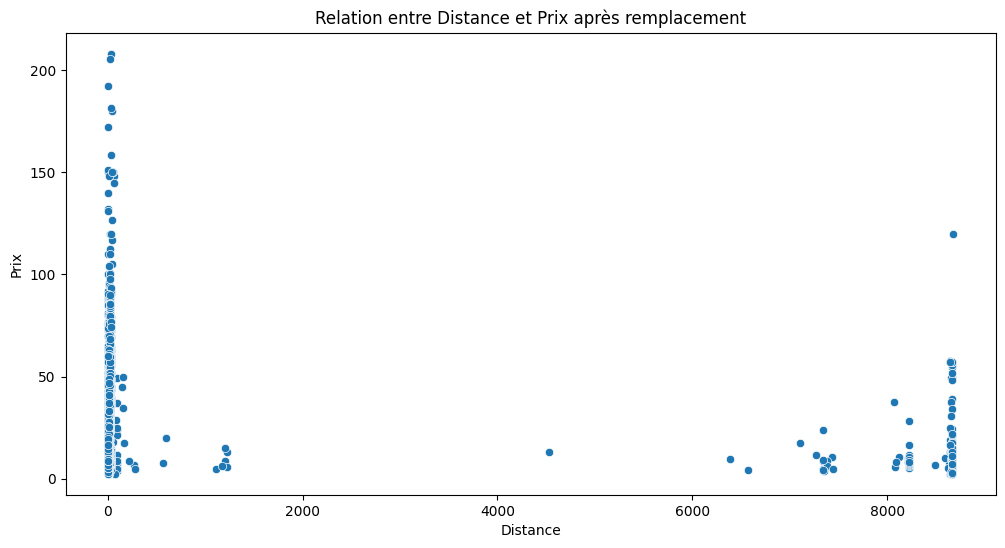

In [129]:
# Visualisation après remplacement
plt.figure(figsize=(12, 6))
sns.scatterplot(x='distance', y='fare_amount', data=df)
plt.title('Relation entre Distance et Prix après remplacement')
plt.xlabel('Distance')
plt.ylabel('Prix')
plt.show()

In [139]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


# Prétraitement des données
# Remplacer les valeurs de 0 par NaN pour les traiter
df['passenger_count'] = df['passenger_count'].replace(0, np.nan)
df['distance'] = df['distance'].replace(0, np.nan)

# Pipeline de prétraitement
preprocessing_pipeline = Pipeline(steps=[
    # Imputation des 0 dans 'passenger_count' par la valeur la plus fréquente
    ('impute_passenger_count', SimpleImputer(strategy='most_frequent')),

    # Imputation des 0 dans 'distance' par la médiane
    ('impute_distance', SimpleImputer(strategy='median')),

    # Mise à l'échelle des données avec MinMaxScaler
    ('scaler', MinMaxScaler())
])

# Séparer les variables d'entrée (X) et la variable cible (y)
X = df[['distance', 'passenger_count']]
y = df['fare_amount']

# Diviser en ensemble d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer le pipeline de prétraitement
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)


In [140]:
print(X_train_processed.shape)
print(X_test_processed.shape)
print(y_train.shape)
y_test.shape

(63518, 2)
(27223, 2)
(63518,)


(27223,)

In [146]:
# Construction du modèle de réseau de neurones avec TensorFlow
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=30, restore_best_weights=True)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='linear'))  # Sortie unique pour la régression (prédiction du prix)

# Compilation du modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entraînement du modèle
history = model.fit(X_train_processed, y_train, callbacks=[es], epochs=500, batch_size=32, validation_split=0.3)

# Évaluer le modèle sur les données de test
test_loss, test_mae = model.evaluate(X_test_processed, y_test)
print(f"Mean Absolute Error on test data: {test_mae}")

# Prédictions sur les données de test
y_pred = model.predict(X_test_processed)

# Calcul de l'écart entre les prédictions et les valeurs réelles
ecart = y_test - y_pred.flatten()
print("Écart moyen:", np.mean(np.abs(ecart)))

/Users/macbook/.pyenv/versions/3.11.9/envs/taxifarefinal/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/500
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 125.7067 - mae: 7.1329 - val_loss: 93.3278 - val_mae: 5.8665
Epoch 2/500
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 90.1352 - mae: 5.8657 - val_loss: 93.7645 - val_mae: 5.6696
Epoch 3/500
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 92.4539 - mae: 5.9149 - val_loss: 93.3229 - val_mae: 5.9856
Epoch 4/500
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 93.4679 - mae: 5.9679 - val_loss: 93.2709 - val_mae: 5.7658
Epoch 5/500
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 89.6032 - mae: 5.8692 - val_loss: 93.0938 - val_mae: 5.7876
Epoch 6/500
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 89.1114 - mae: 5.8690 - val_loss: 92.7343 - val_mae: 5.9461
Epoch 7/500
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 88.5042 - mae: 5.8131 - val_loss: 92.3417 - val_mae: 5.7725
Epoch 8/500
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 88.1577 - mae: 5.8201 - val_loss: 91.4988 - val_mae: 5.8067
Epoch 9/500
139

In [ ]:
! git add .
! git commit